# Part II - Effects of Loan Characteristics on Borrower's APR
## by Teminijesu Ogunleye

## Investigation Overview


> In this investigation, I was keen on understanding the rationale behind borrowers motivation when applying for a loan and what factors if any affects a loan's outcome status.


## Dataset Overview

> The dataset consisted of borrower APRs and attributes of 113,937 loans. The attributes included original loan amount, borrower's Prosper rating, loan term, borrower's stated monthly income, as well as many other features such as borrower's employment status, debt to income ratio, current loan status etc. 1165 duplicate data points were removed from the analysis.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
prosper_loan = pd.read_csv(r'C:\Users\TEMINIJESU OGUNLEYE\Downloads\prosperLoanData.csv')
# Subset the dataframe by selecting only the variables of interest
cols = ['ListingCategory (numeric)', 'IsBorrowerHomeowner', 'IncomeVerifiable', 'DebtToIncomeRatio', 'StatedMonthlyIncome', 'Term', 'ProsperRating (Alpha)',
                'EmploymentStatus', 'LoanStatus', 'LoanOriginalAmount', 'BorrowerAPR']
prosper_loan_sub = prosper_loan[cols]
# data wrangling, rename columns appropriately
prosper_loan_sub = prosper_loan_sub.rename(columns = {'ListingCategory (numeric)': 'ListingCategory', 'ProsperRating (Alpha)': 'ProsperRating'})
# data wrangling,drop duplicates and null values from the dataset
prosper_loan_sub = prosper_loan_sub.drop_duplicates()
prosper_loan_sub = prosper_loan_sub[~prosper_loan_sub.BorrowerAPR.isna()]
prosper_loan_sub = prosper_loan_sub[~prosper_loan_sub.ProsperRating.isna()]
# Convert the ProsperRating and Employment status into an ordered categorical types
prosperrating_order = ['AA', 'A', 'B', 'C', 'D', 'E', 'HR']
ordered_prosperrating = pd.api.types.CategoricalDtype(ordered = True,
                                    categories = prosperrating_order)
prosper_loan_sub['ProsperRating'] = prosper_loan_sub['ProsperRating'].astype(ordered_prosperrating)
prosper_loan_sub.shape

(83698, 11)

## Distribution of Borrower's APR

> The distribution of APR looks multimodal. A small peak centered at 0.1, a large peak centered at 0.2. There is also a small peak centered at 0.3. Additionally, there is a very sharp peak between 0.35 and 0.36. Only very few loans have APR greater than 0.4.

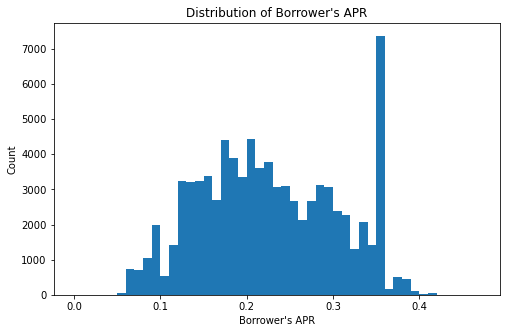

## Distribution of Original Loan Amount

> The very large spikes in frequency are at the 5k multiples. This may indicate that People prefer to borrow in multiples of 5k.
> There were also small spikes at 8k,9k,11k,12k,13k,14k etc meaning most of the loans are in multiples of 1k.

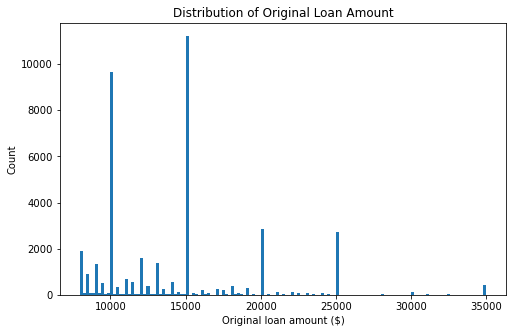

## Distribution of Loan Status

> The dataset is mostly comprised of current and completed loans (over 50,000 and 20,000 loan records) respectively. Charged off loans are about 5,000 records indicating losses for investors. I will be zooming in on the defaulting, charged off and past-due loans to see if there are features driving this kind of loan outcome status from borrowers.

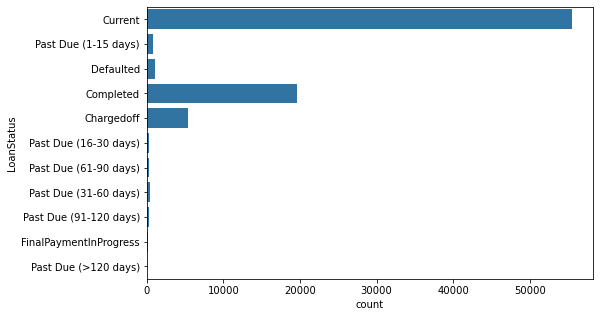

In [6]:
Loan_Status1 = prosper_loan_sub.drop(prosper_loan_sub[prosper_loan_sub.LoanStatus == "Current"].index)
Loan_Status2 = Loan_Status1.drop(Loan_Status1[Loan_Status1.LoanStatus == "Completed"].index)
Loan_Status = Loan_Status2.drop(Loan_Status2[Loan_Status2.LoanStatus == "FinalPaymentInProgress"].index)
Loan_Status.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8378 entries, 12 to 113905
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   ListingCategory      8378 non-null   int64   
 1   IsBorrowerHomeowner  8378 non-null   bool    
 2   IncomeVerifiable     8378 non-null   bool    
 3   DebtToIncomeRatio    7174 non-null   float64 
 4   StatedMonthlyIncome  8378 non-null   float64 
 5   Term                 8378 non-null   int64   
 6   ProsperRating        8378 non-null   category
 7   EmploymentStatus     8378 non-null   object  
 8   LoanStatus           8378 non-null   object  
 9   LoanOriginalAmount   8378 non-null   int64   
 10  BorrowerAPR          8378 non-null   float64 
dtypes: bool(2), category(1), float64(3), int64(3), object(2)
memory usage: 614.0+ KB


## Deafulted and Defaulting Loan Status vs. Prosper Ratings, Loan Term and Employment Status

> - Most borrowers who had defaulted or are defaulting are those who took the longer term loans of 3 and 5years. The highest defaults also seems to be happening at the 3years(36months) listings product. Although, the 36months loan term listing had the highest number of borrowers which might have contributed to the high default.
> - Interestingly, most of the borrowers who defaulted or are defaulting are employed. It would have been nice to see the Industry of employment and possibly see if it can be narrowed to industries. Although, it most be noted that about 60% of their borrowers are employed, this might just be the associated cost of playing in that market.
> - The AA rated borrowers had the lowest level of default which might be an indication of the relaibility of the prosper rating methodology.

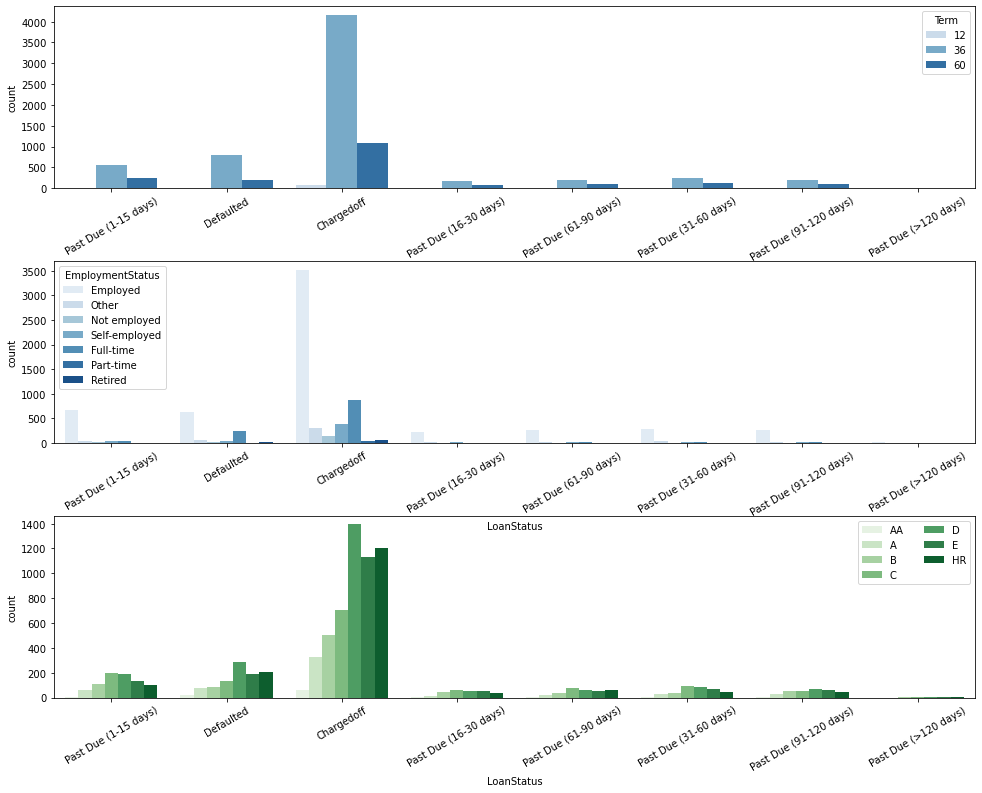

## Borrower's APR vs. Loan Amount

> At different size of the loan amount, the APR has a large range, but the range of APR decreases with the increase of loan amount. Overall, the borrower's APR decreases with an increase of the loan amount (Negative correlation)

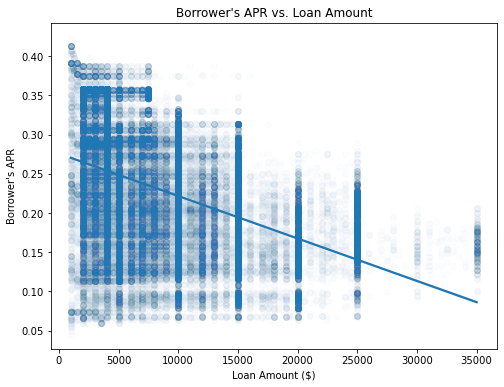

## Borrower's APR vs. Prosper Rating

> The borrower's APR decreases with the increasingly better rating. Borrowers with higher Prosper ratings have the lowest APR. It means that the Prosper rating is also negatively correlated with the borrower's APR and has a strong effect on it.

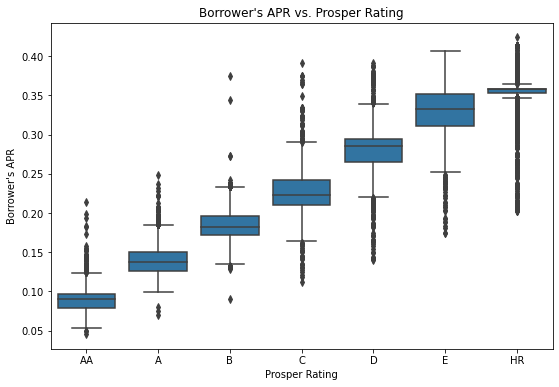

## Home ownership and Loan Term effect on Loan Original Amount and Prosper Ratings

> Across all prosper ratings, the longer term loans obtained higher loan amounts than the short-term loan of 12months. It also seems the longer the term, the higher the amount. This is expected considering that longer terms means higher number of repayments which increases the ability to access higher loans.

> Across all prosper ratings, homeowners were able to access higher loan amounts than those without homes. It also seems to elucidate the fact that owning a home might be a good consideration especially when higher loan amounts are involved.

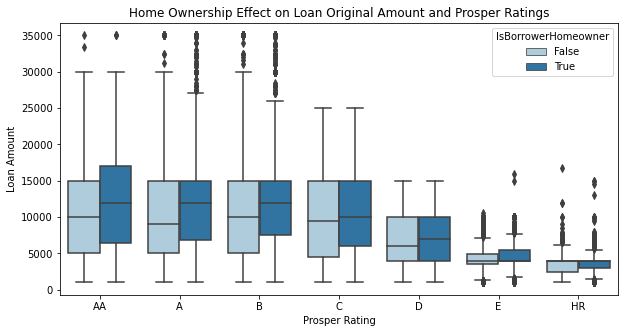

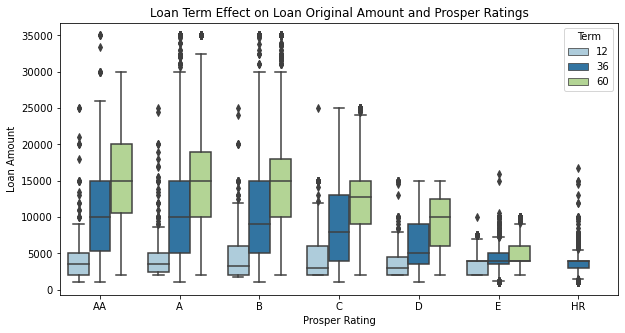

## Borrower's APR by Rating and Term

> Interestingly, the borrower's APR decreases with an increase of the loan term for people with HR-C raings. But for people with B-AA ratings, the APR increases with an increase of the loan term.

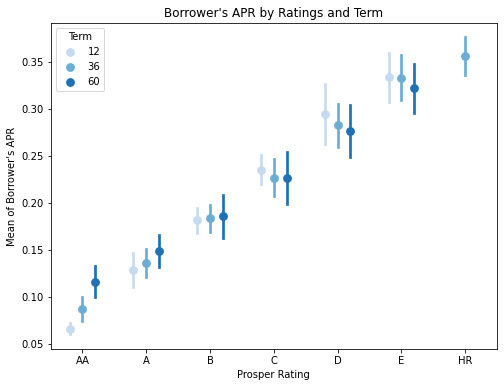